# Space & Time

## Burgers' Equation

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from sympy import init_printing
init_printing()

In [2]:
x, nu, t = sp.symbols('x nu t')
phi = sp.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sp.exp(-(x-4*t-2*np.pi)**2/(4*nu*(t+1)))
phi

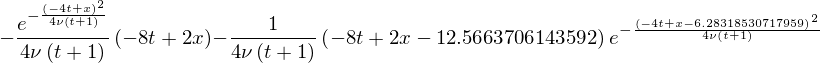

In [3]:
phiprime= phi.diff(x)
phiprime

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


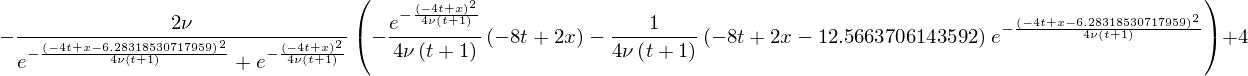

In [4]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)
u

In [5]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x=4, nu=3 is %.3f."%(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.492.


In [17]:
###variable declarations
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
nu = .07
sigma = .1
dt = sigma*dx**2/nu 

x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
t = 0

### create array of initial u at all x values
u = np.asarray([u_lamb(t, x0, nu) for x0 in x])

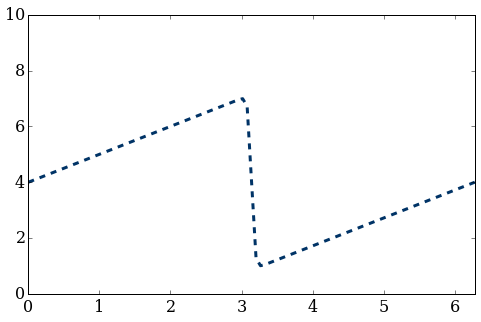

In [8]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.xlim([0,2*np.pi])
pyplot.ylim([0,10]);

In [9]:
for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
    u_analytical = np.asarray([u_lamb(nt*dt, xi, nu) for xi in x])

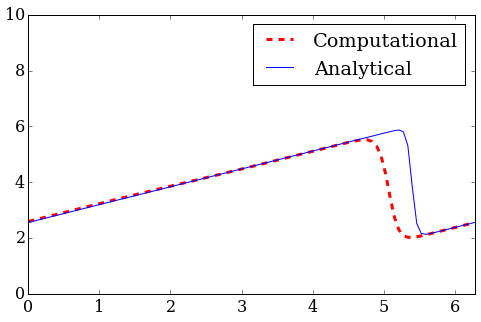

In [12]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='red', ls='--', lw=3, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0,2*np.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [11]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [15]:
x, nu, t = sp.symbols('x nu t')


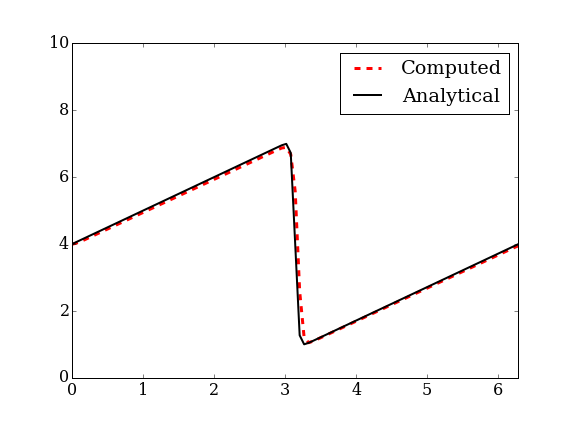
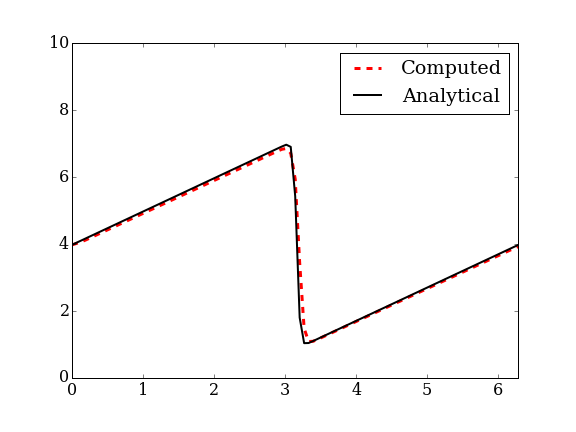
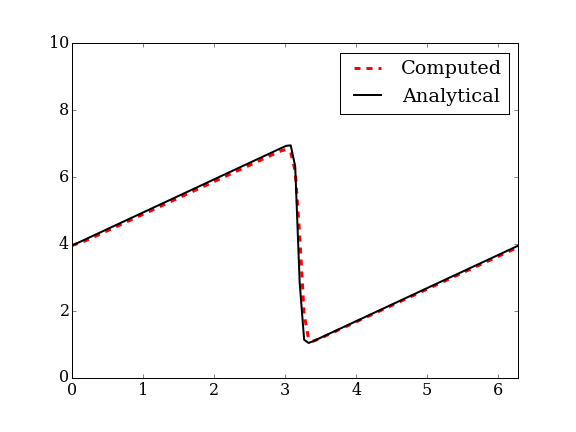
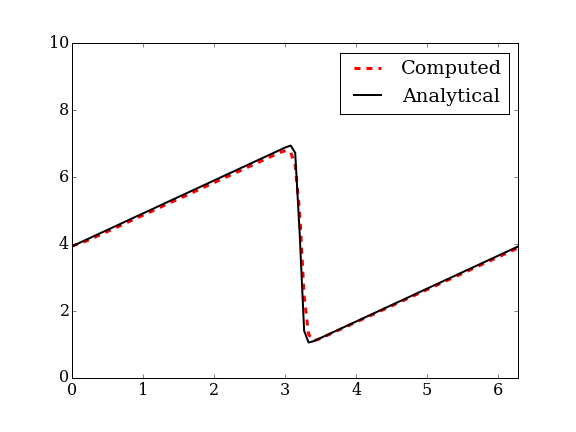
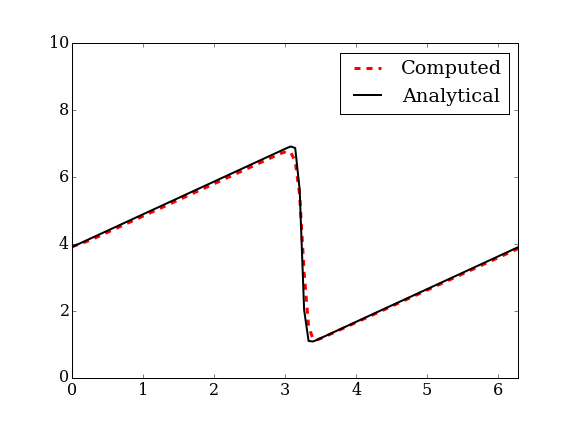
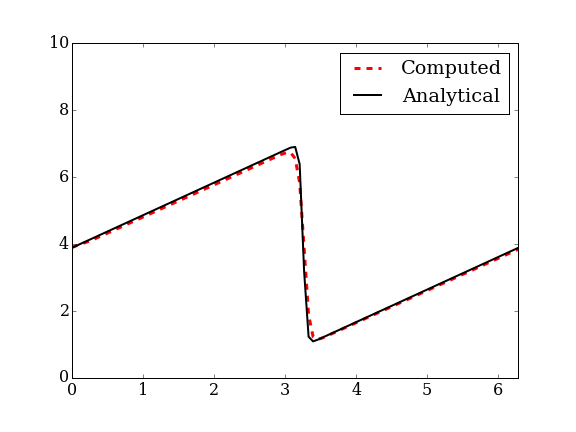
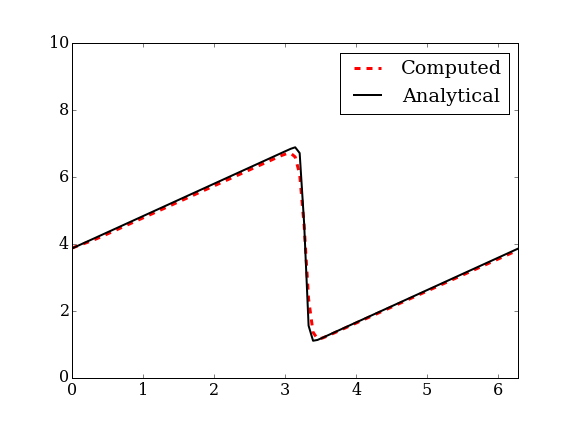
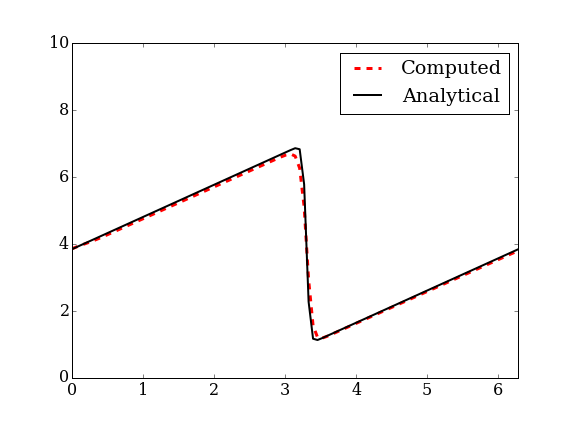
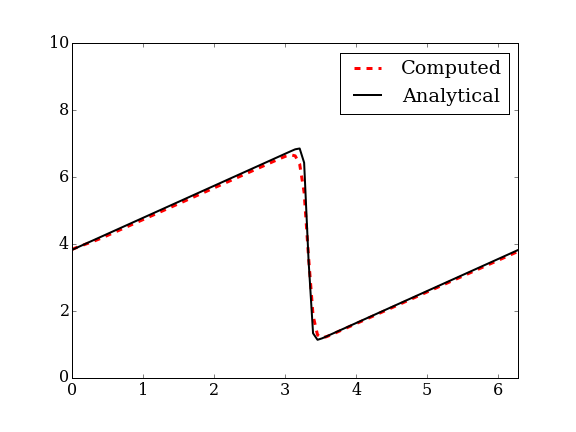
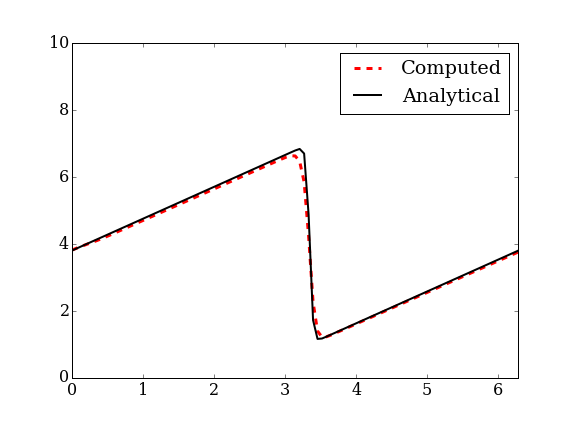
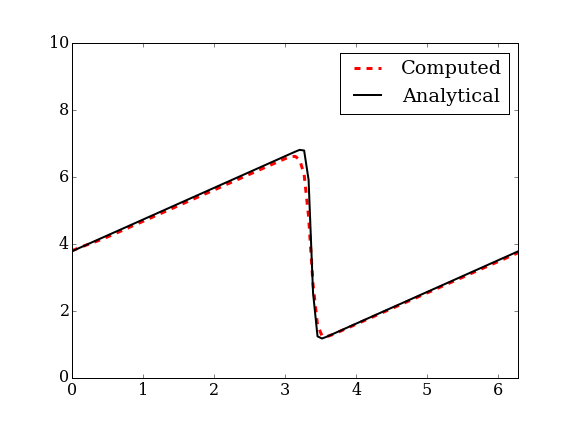
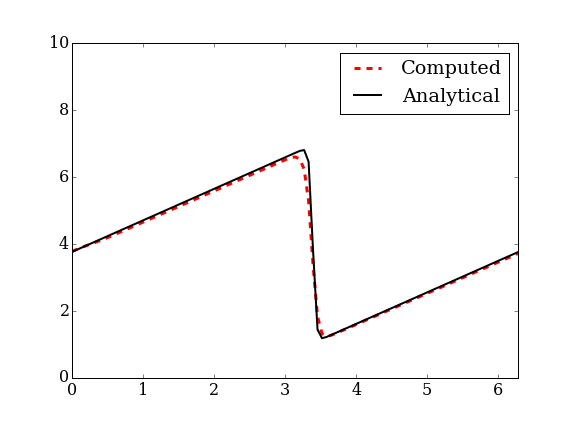
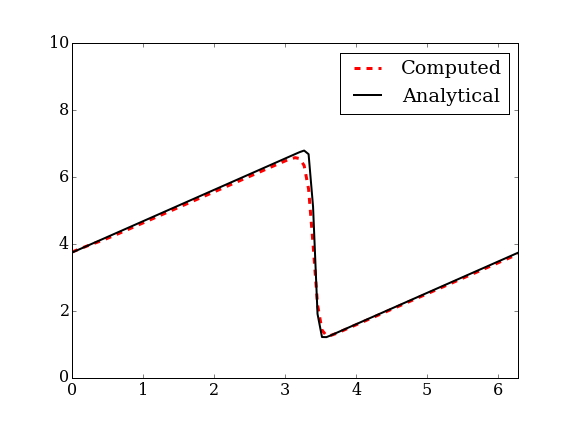
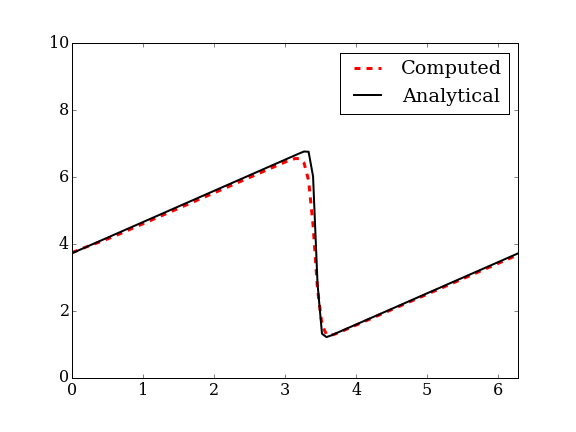
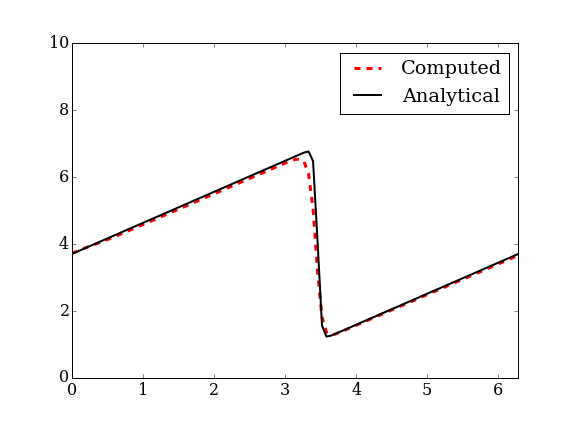
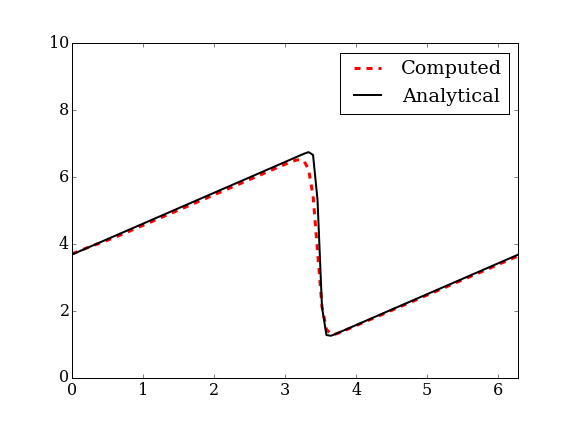
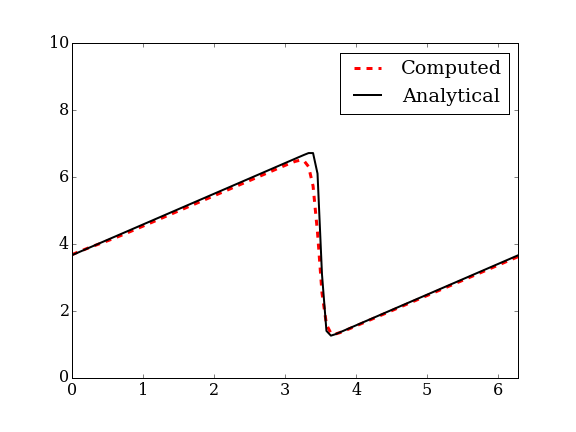
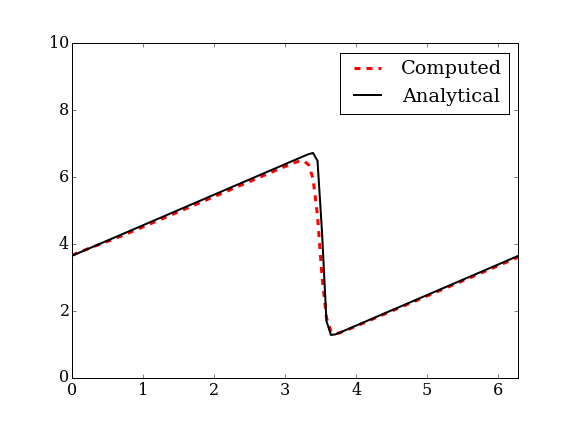
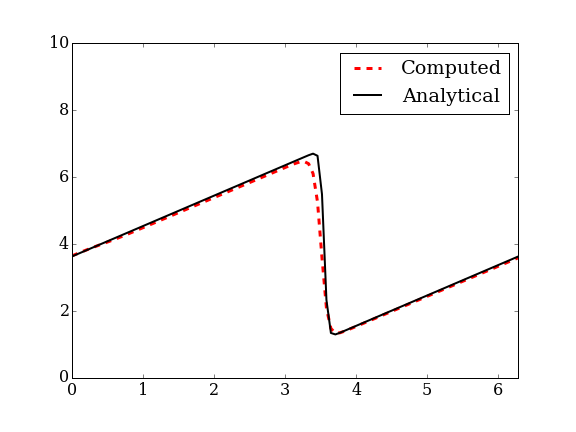
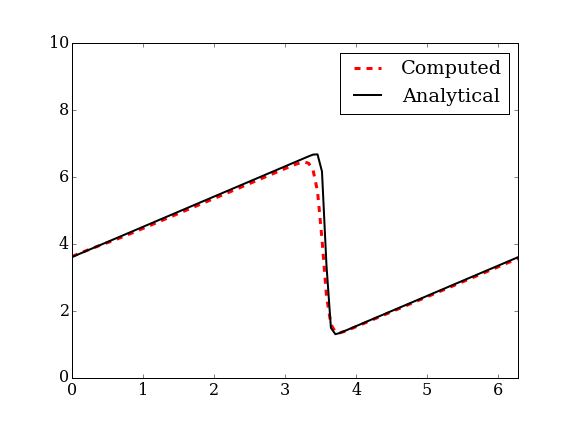
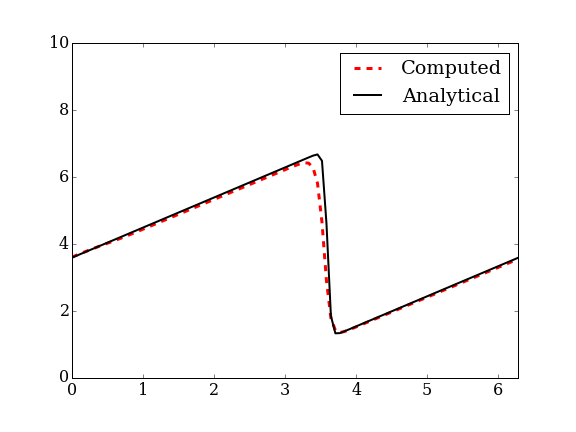
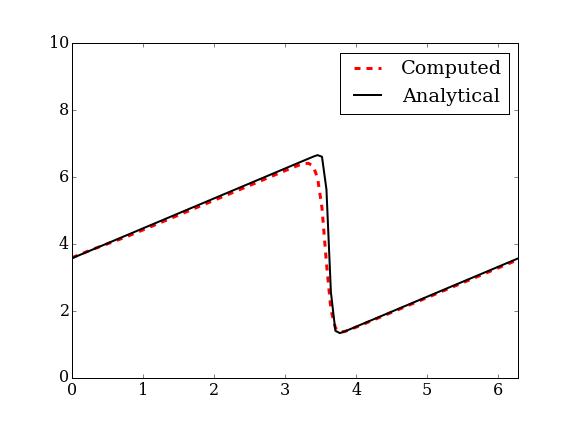
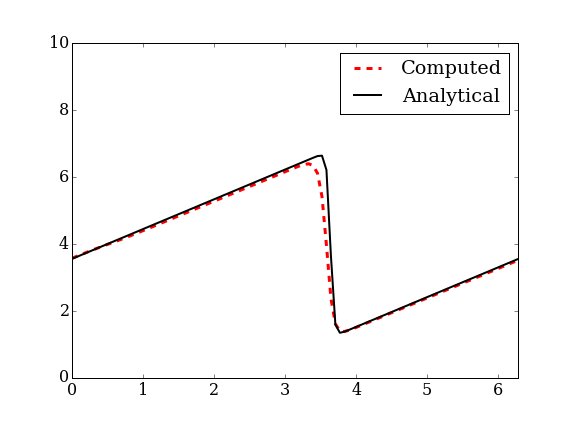
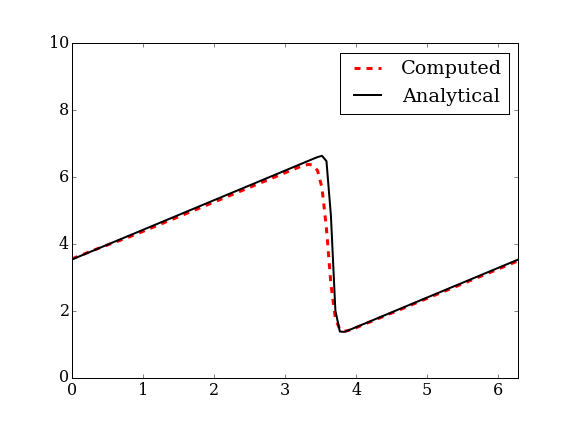
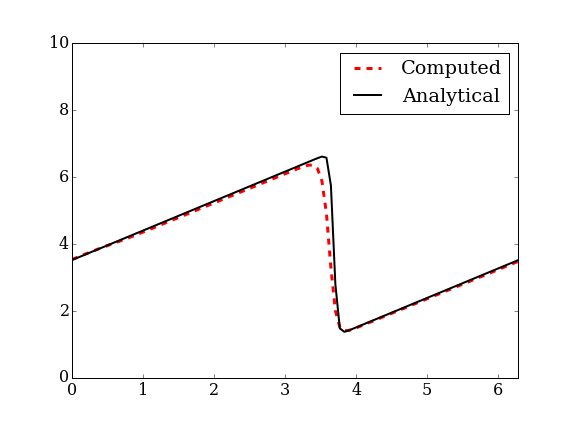
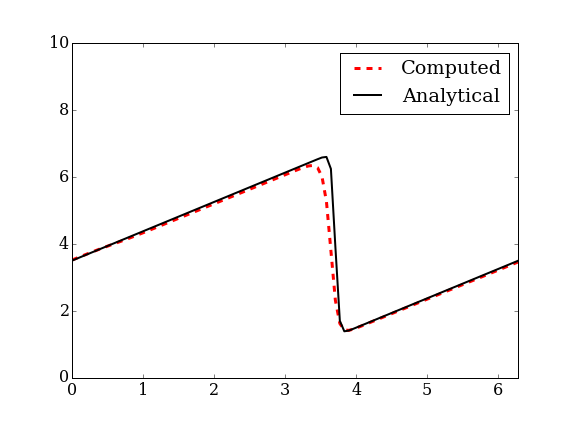
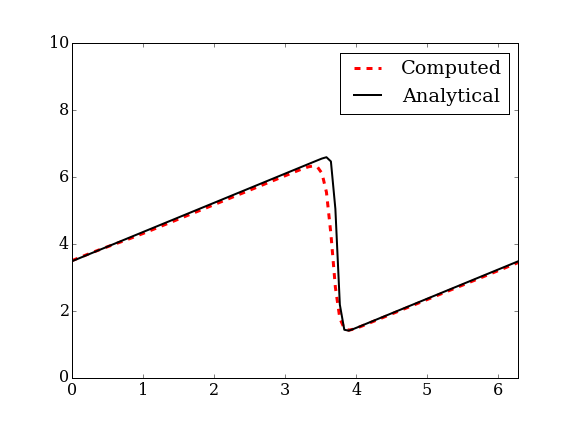
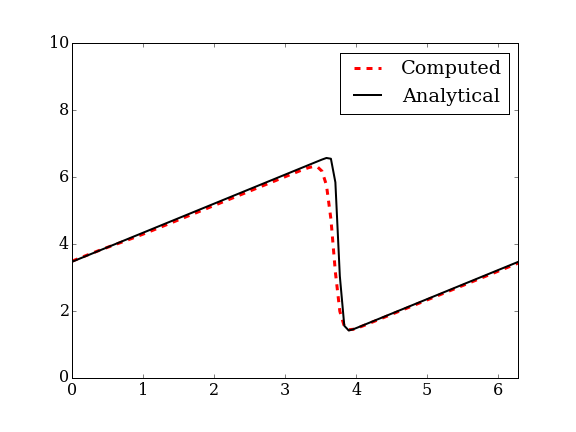
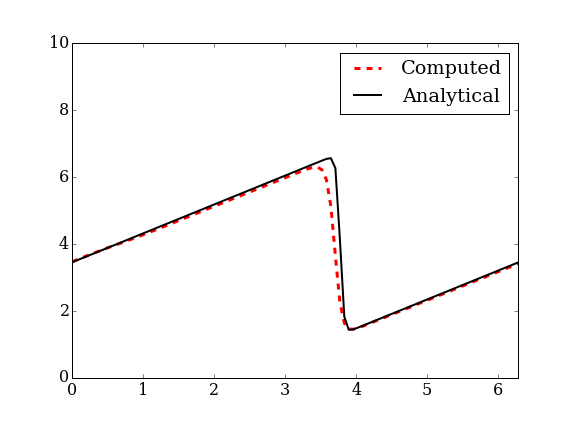
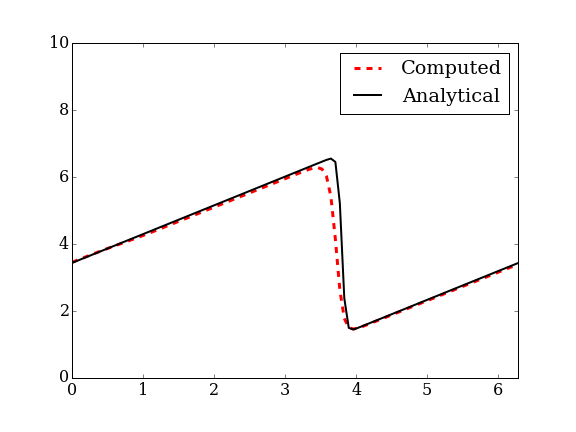
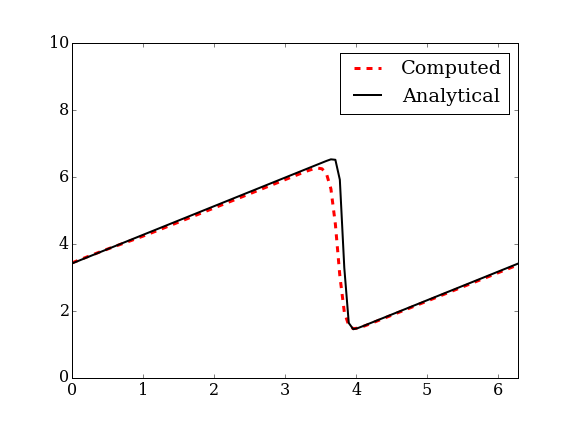
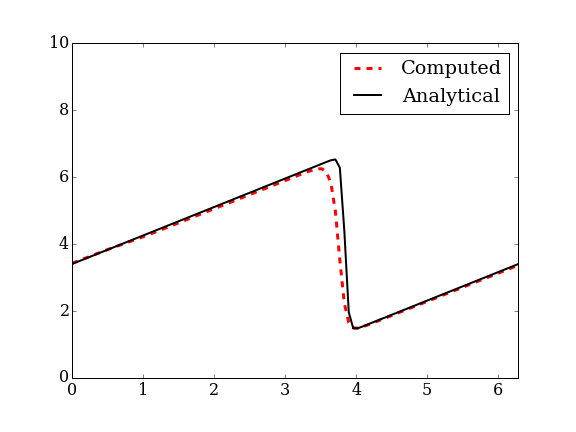
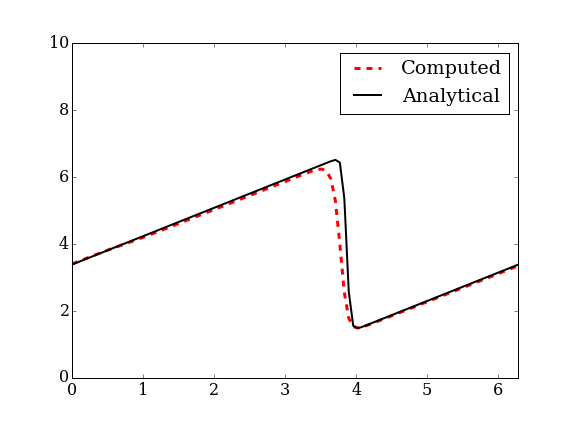
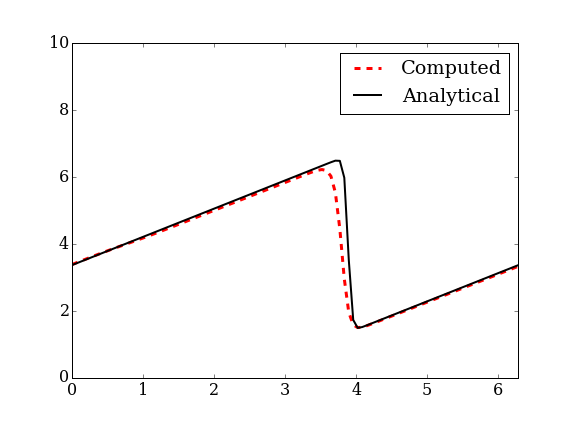
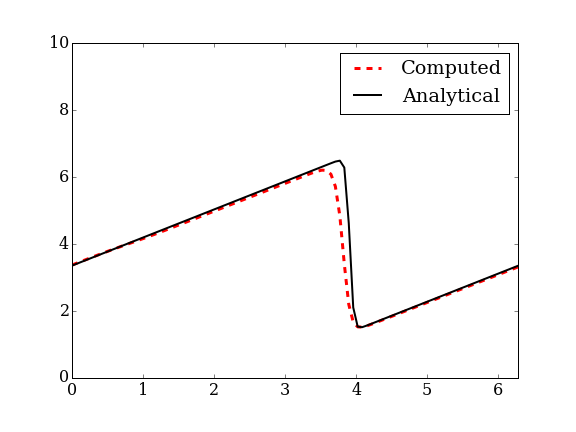
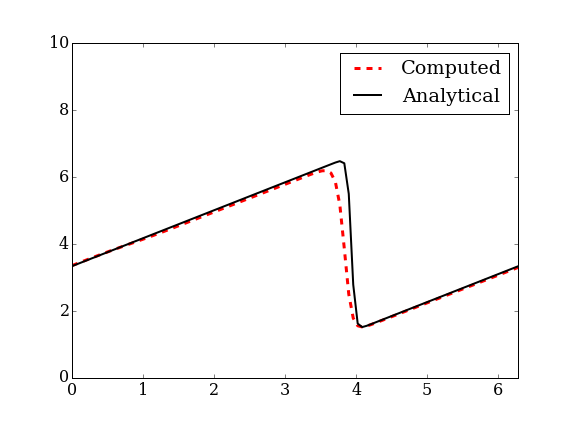
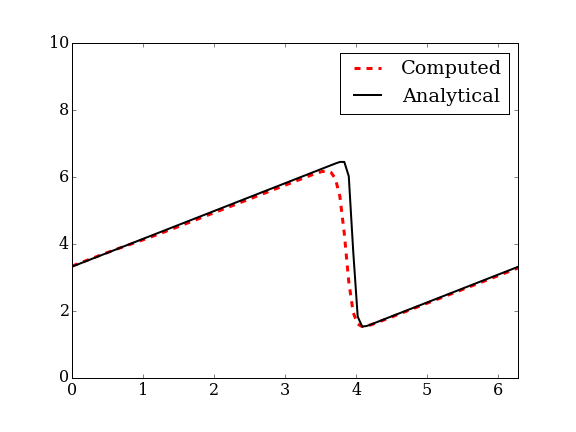
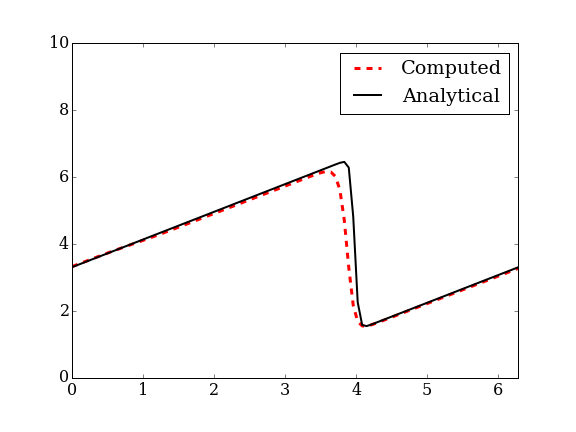
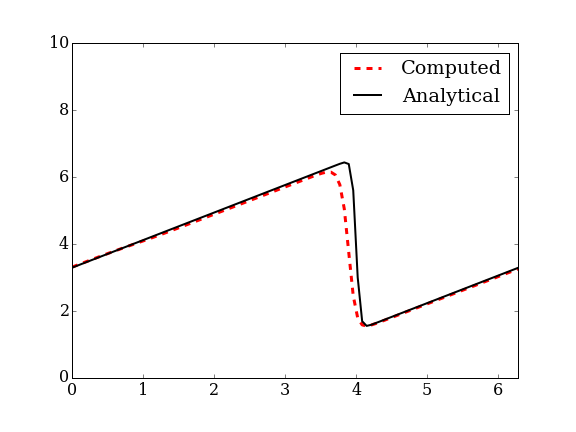
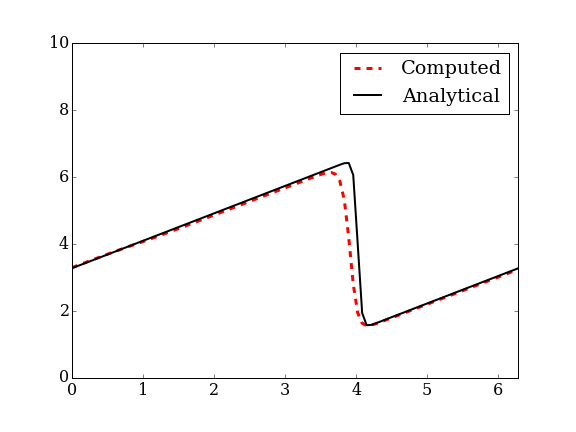
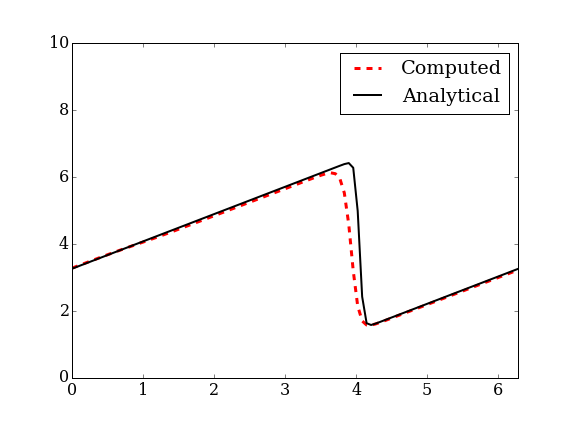
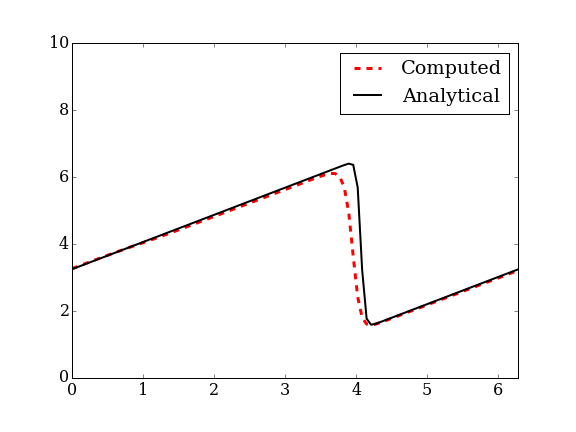
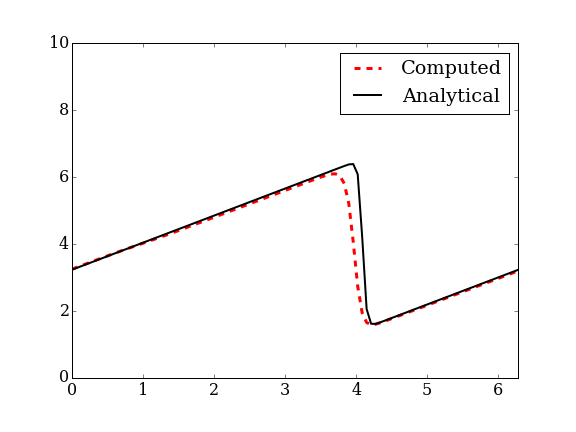
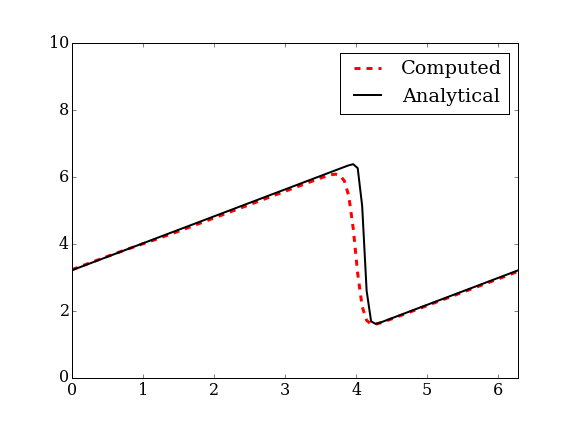
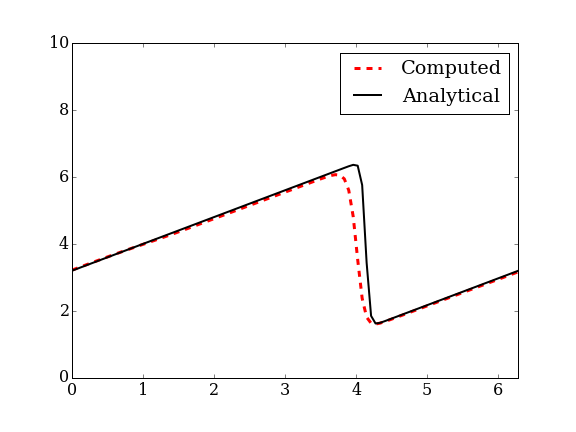
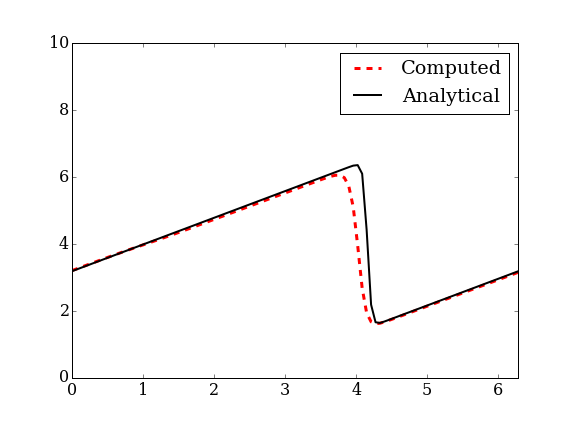
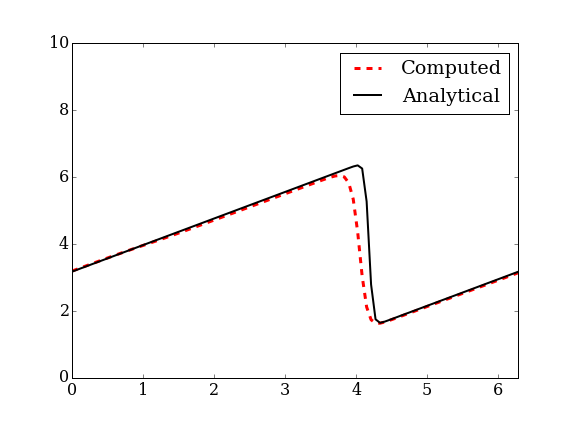
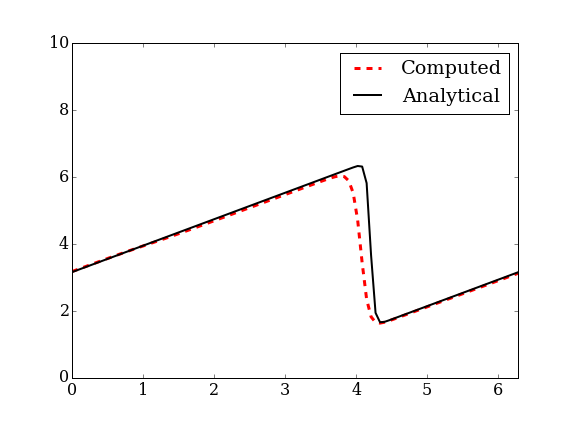
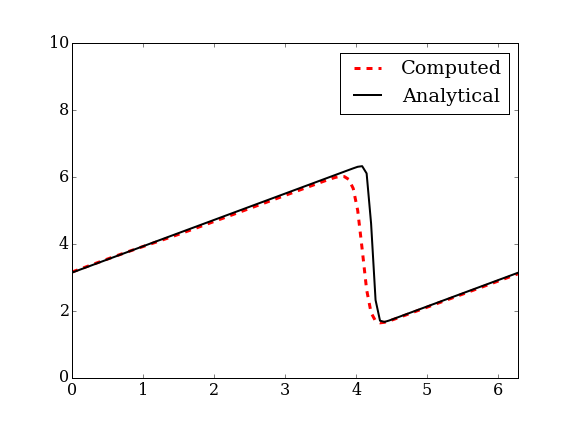
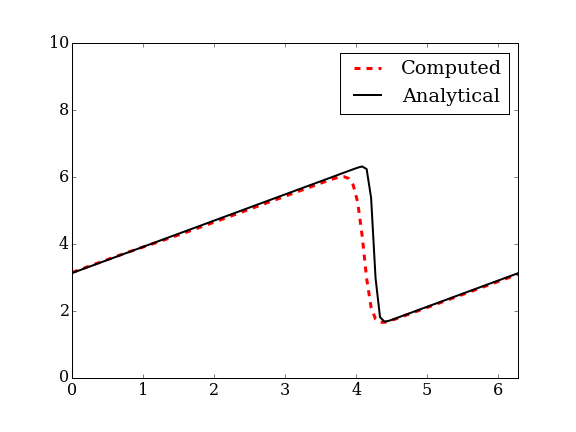
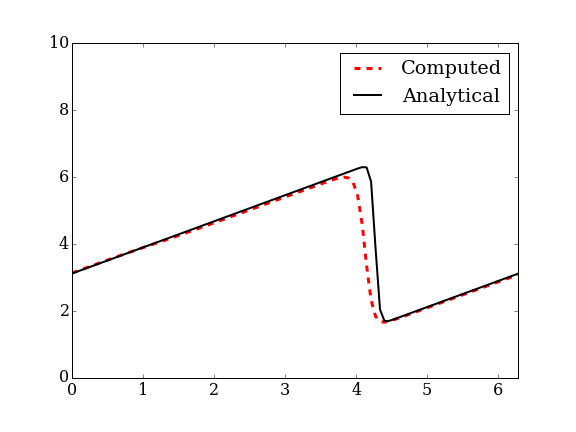
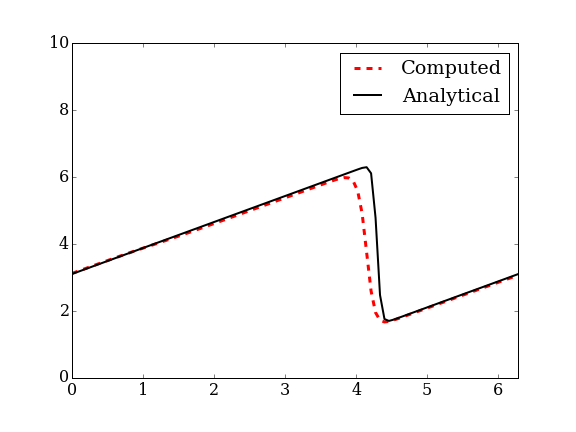
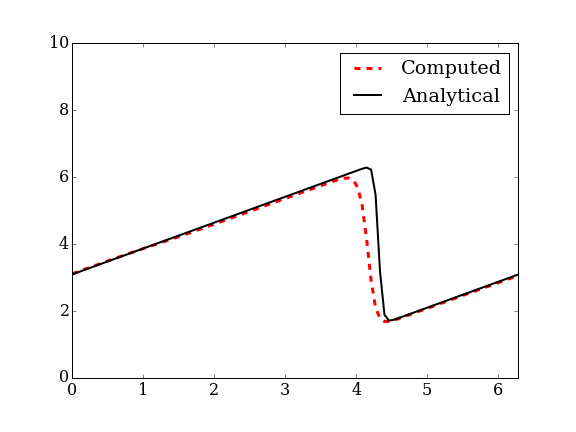
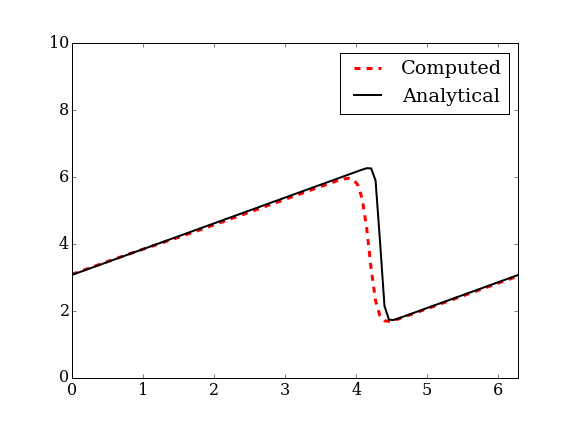
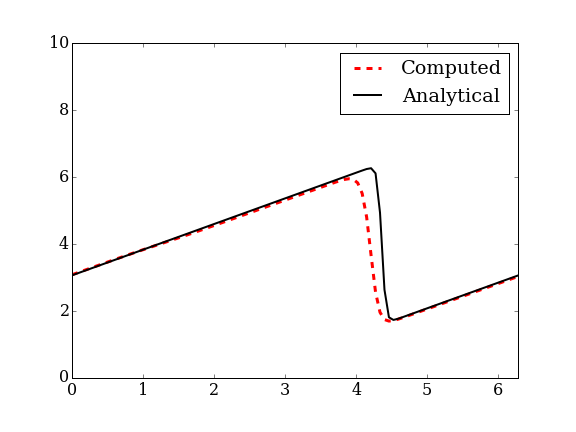
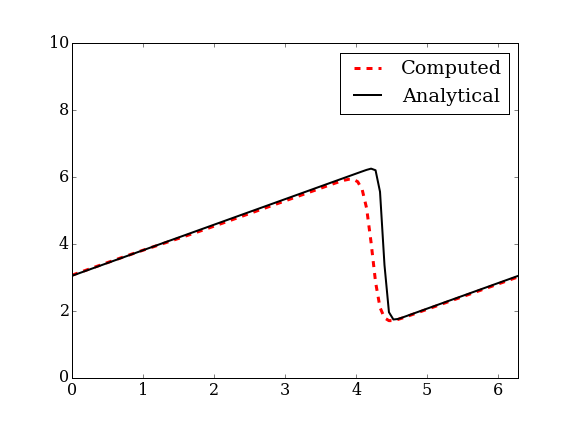
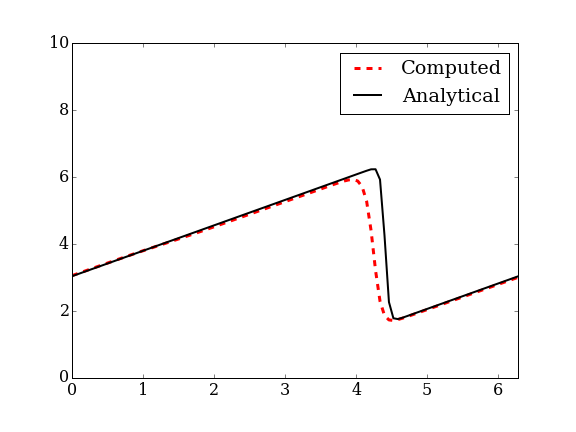
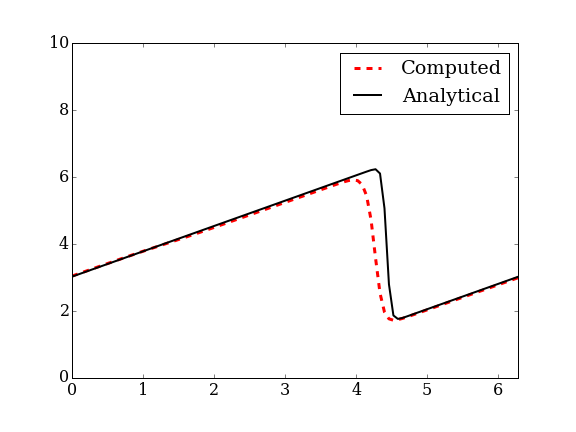
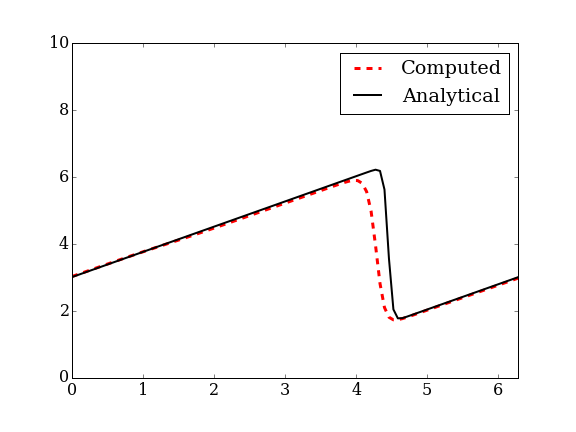
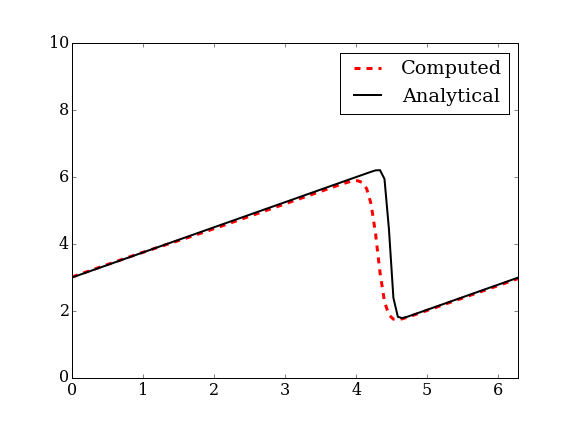
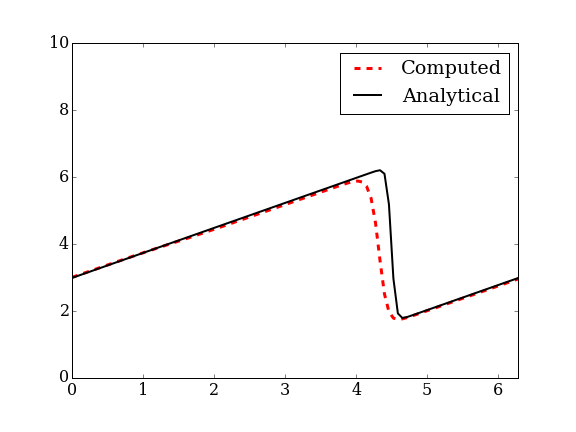
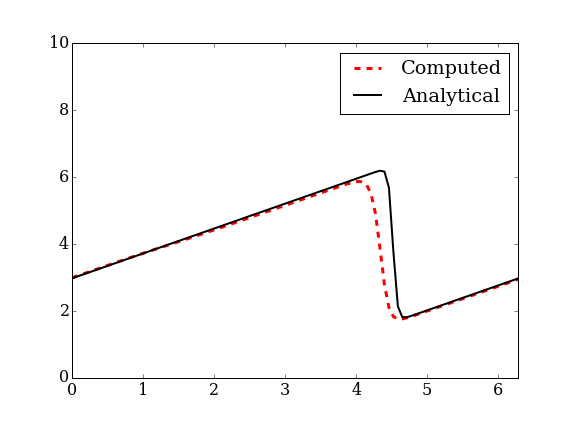
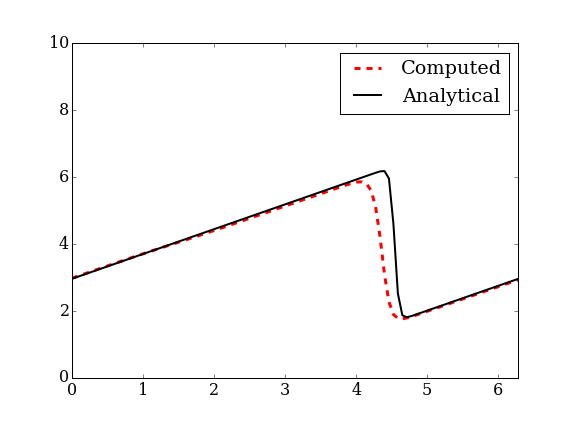
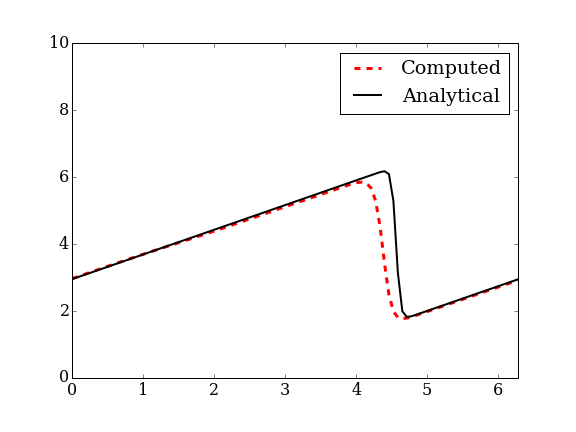
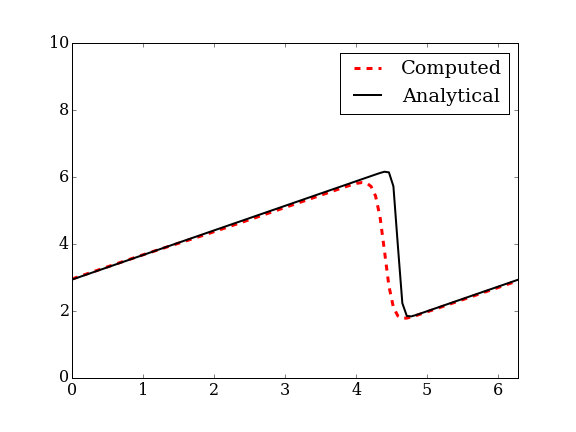
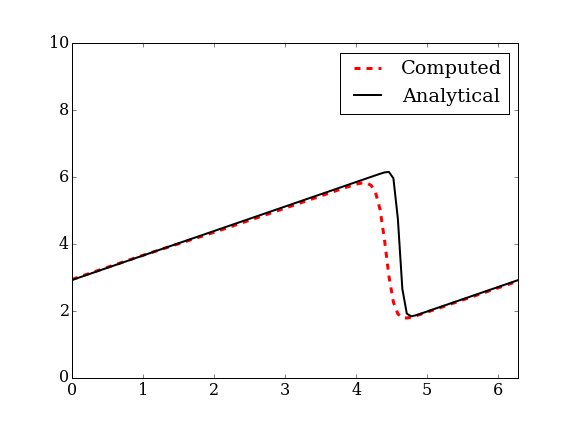
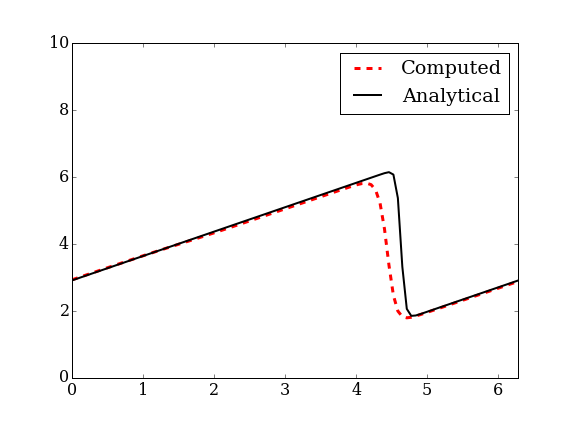
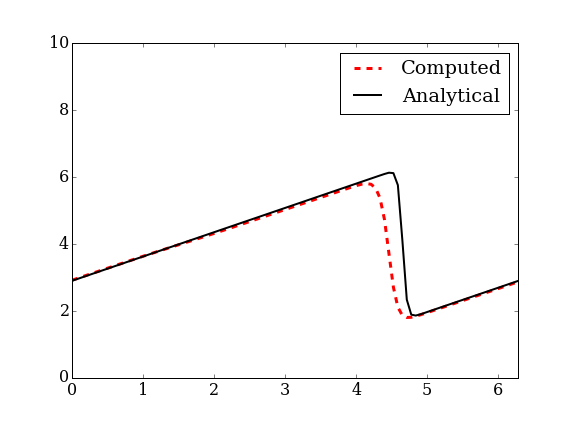
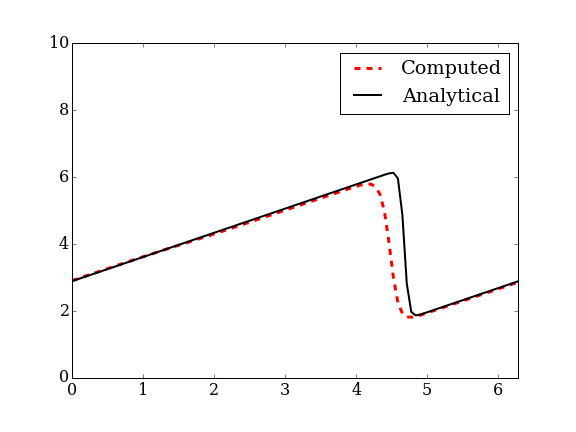
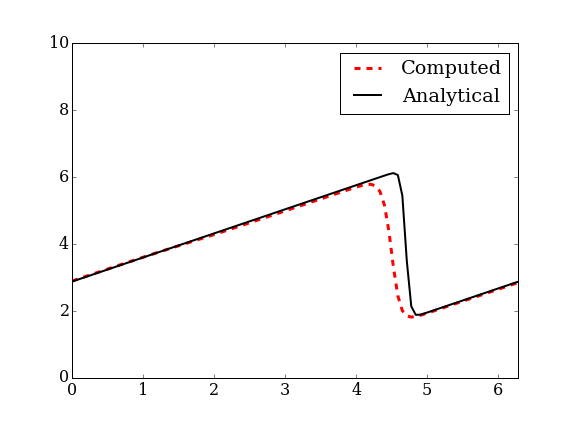
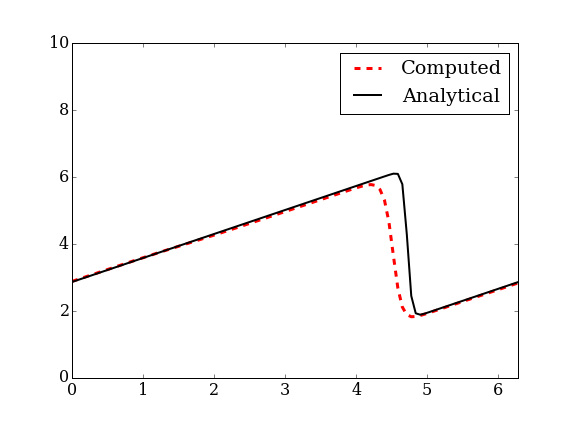
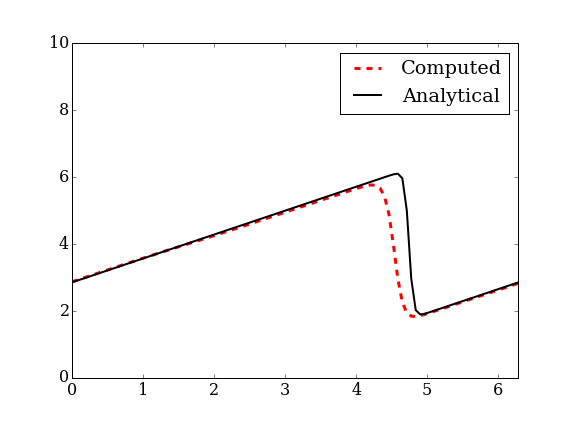
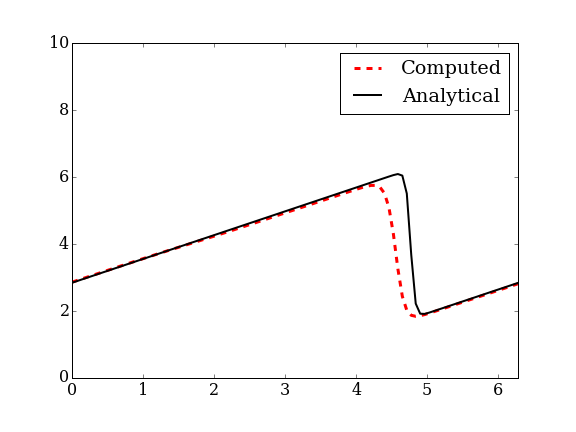
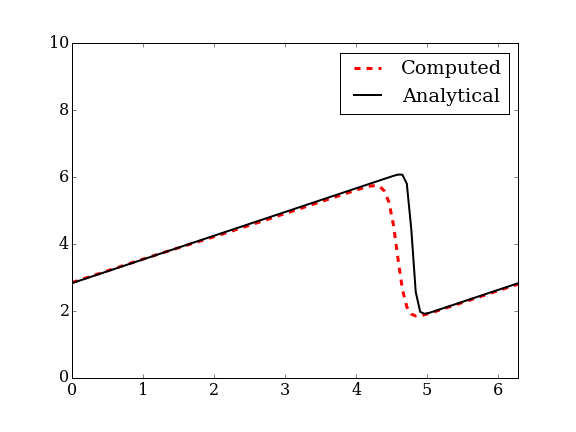
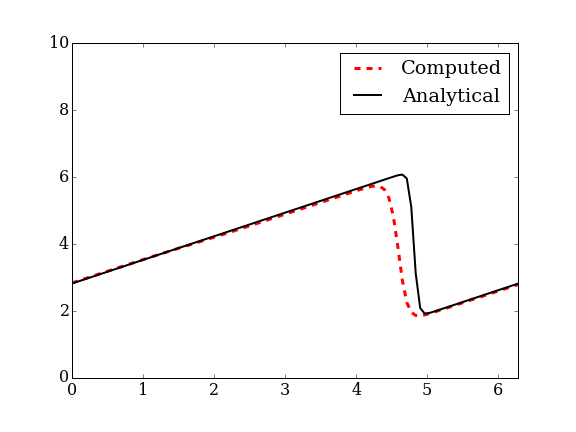
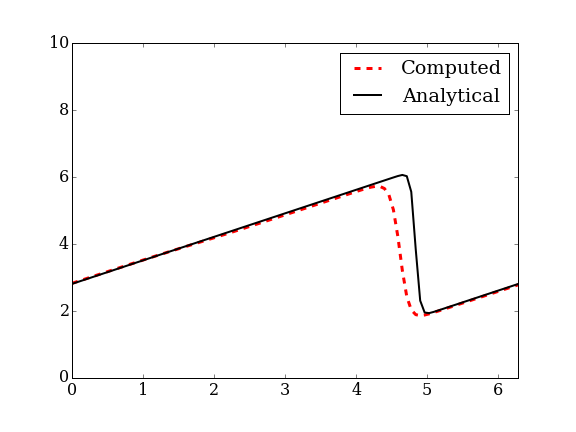
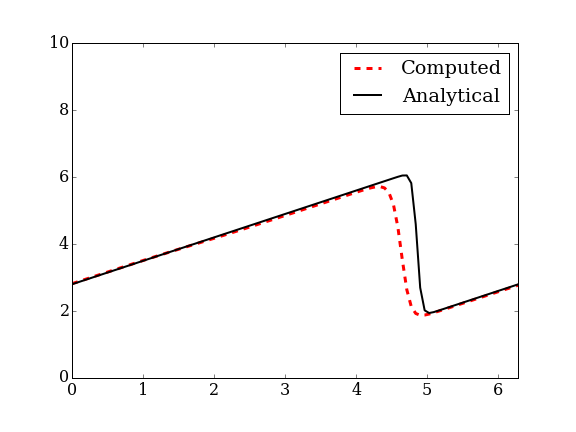
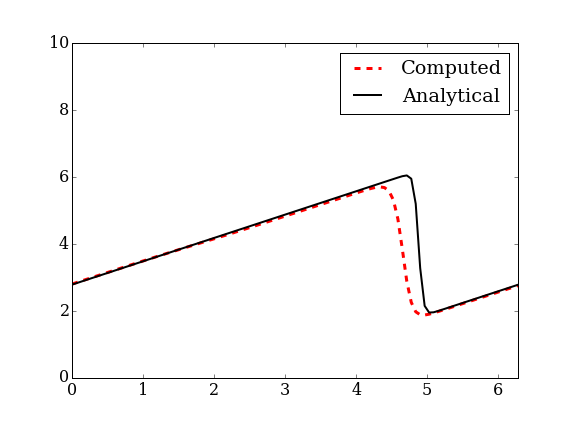
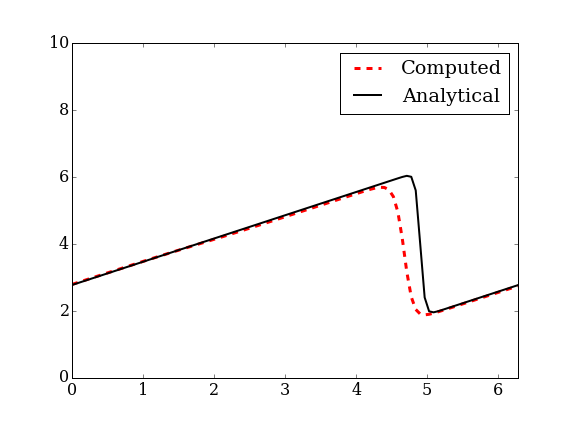
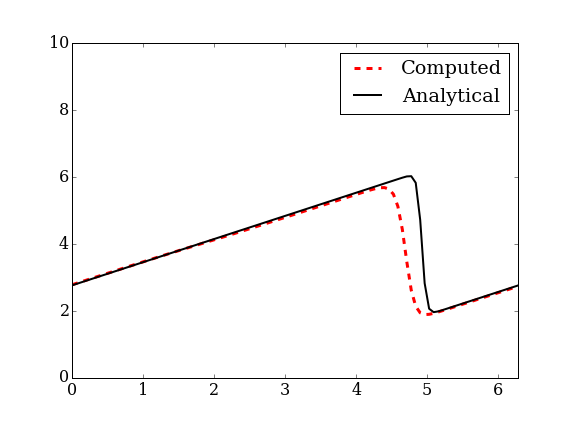
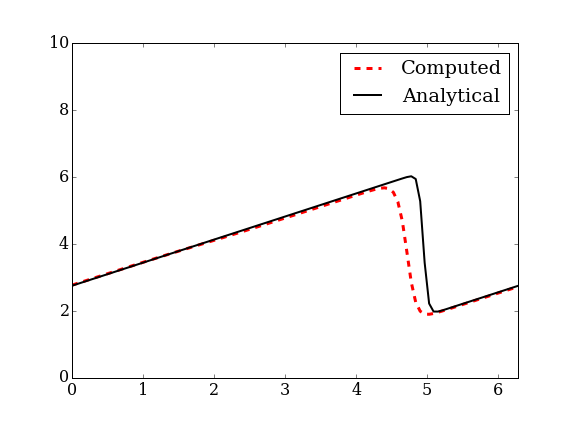
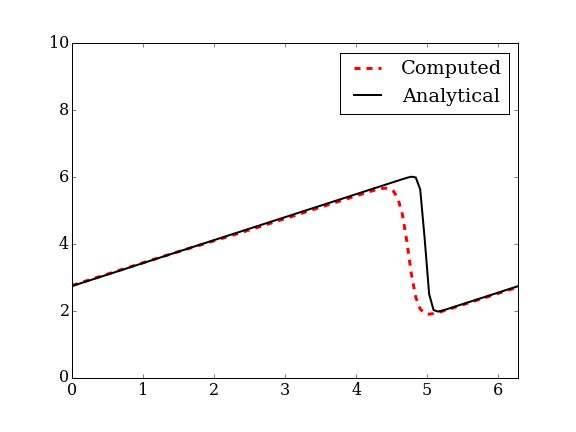
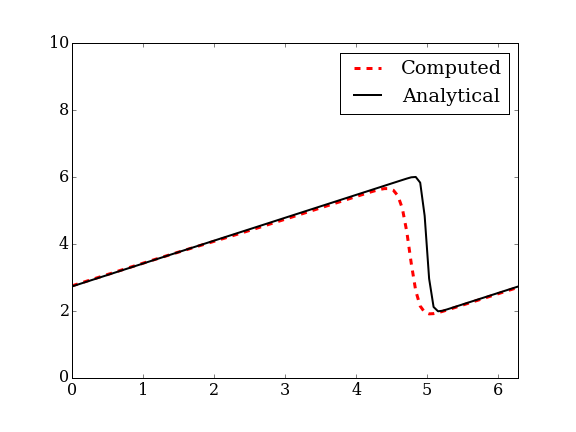
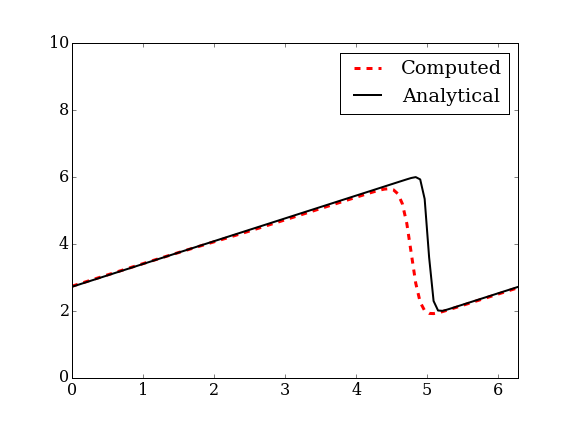
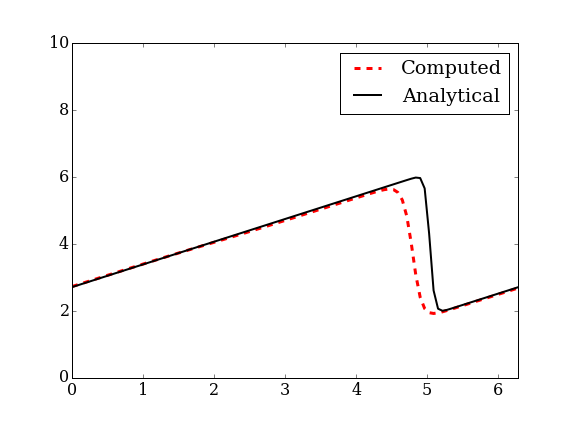
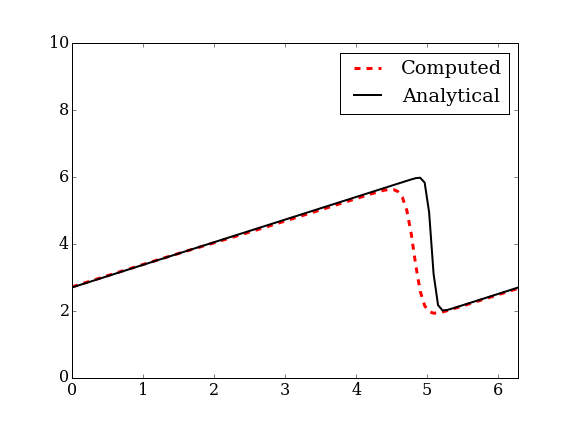
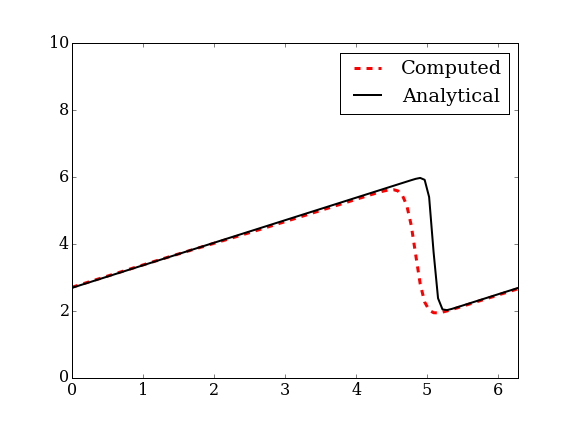
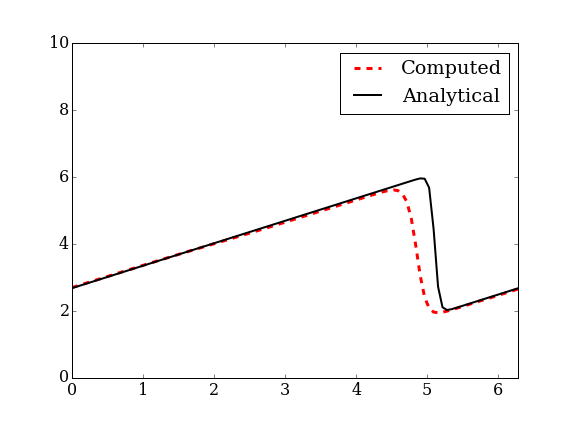
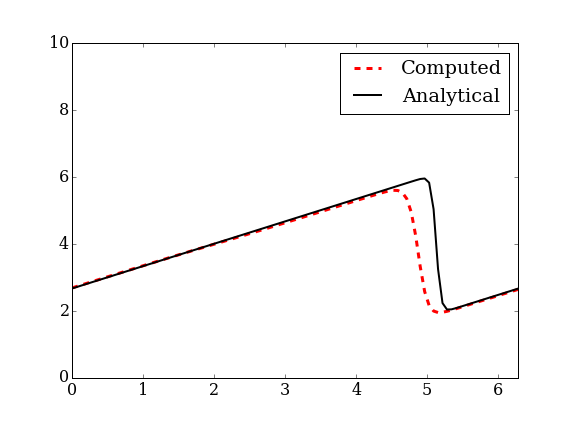
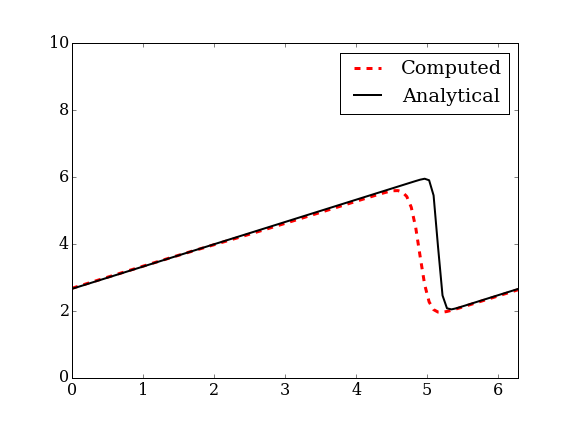
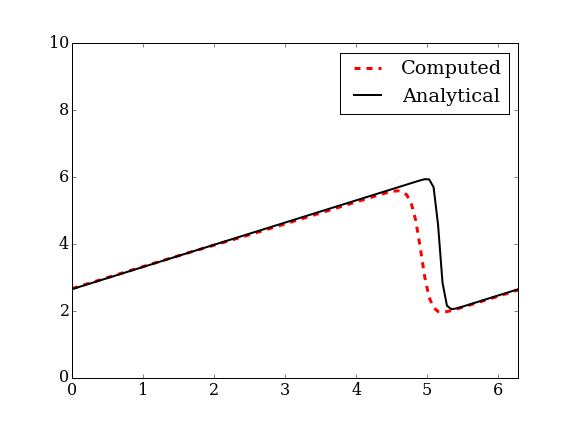
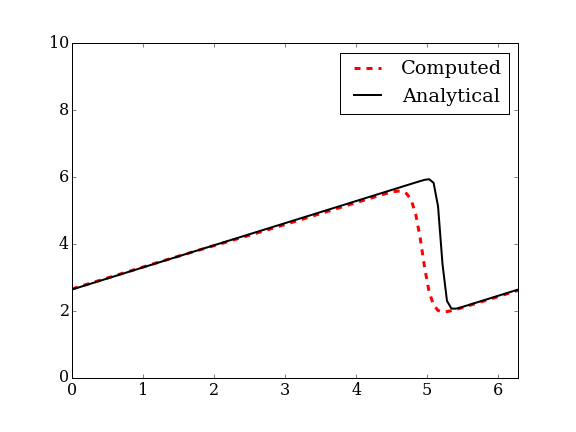
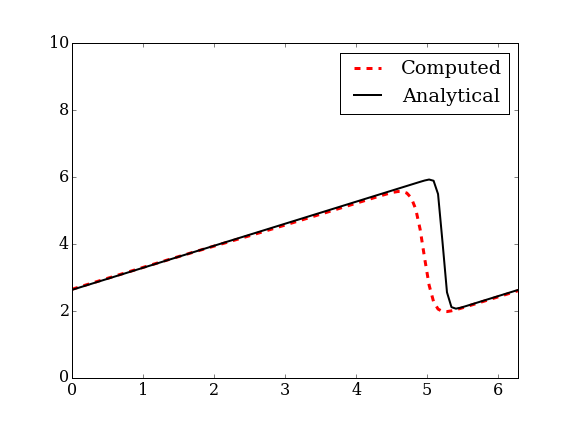
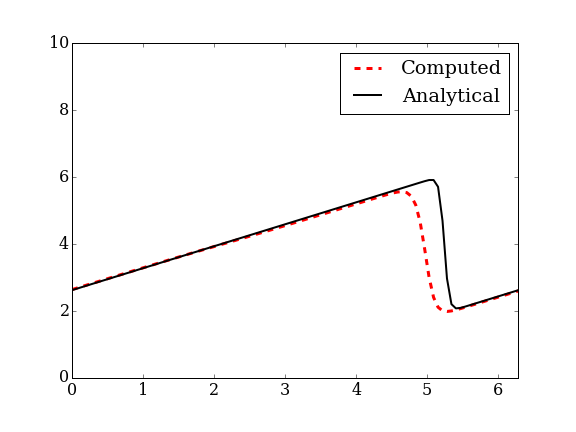
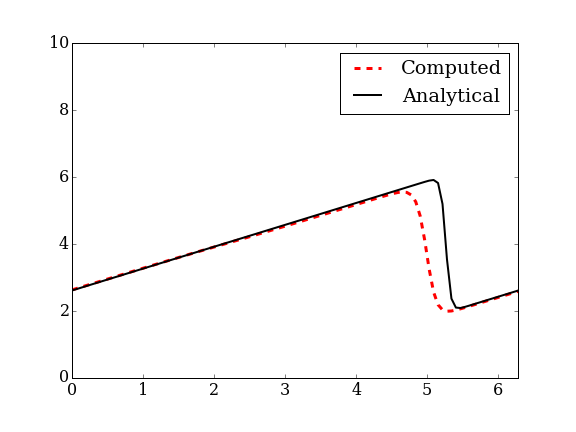
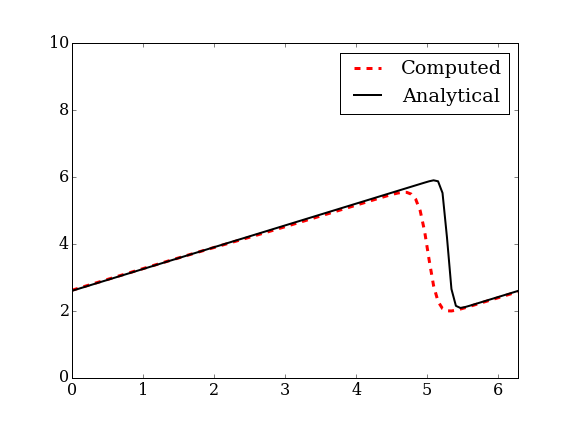
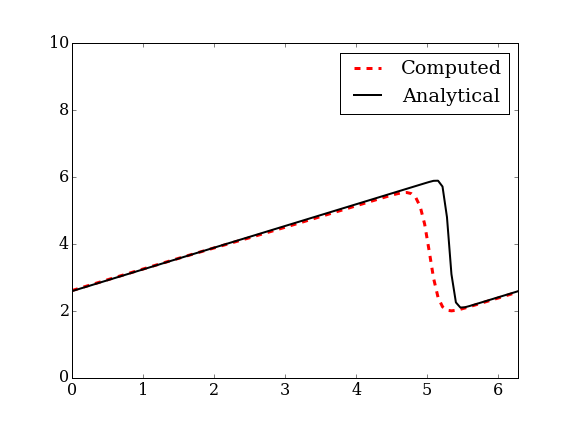
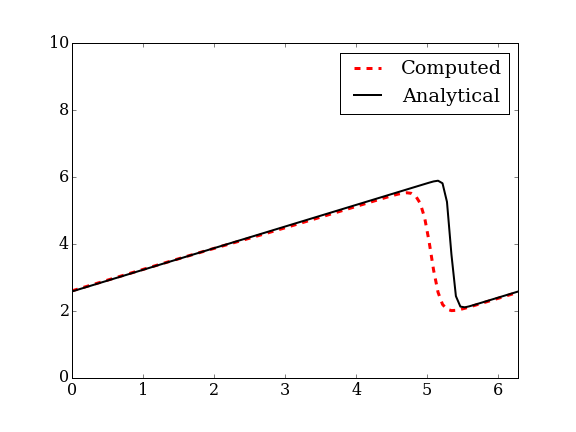
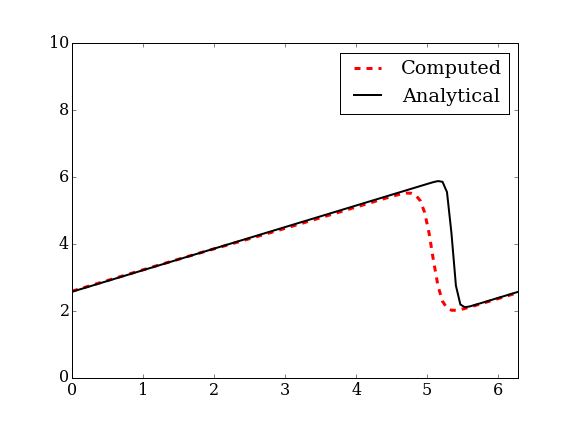
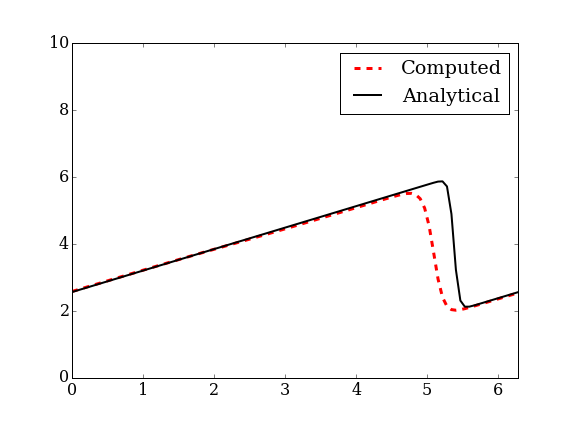

In [18]:
u = np.asarray([u_lamb(t, x0, nu) for x0 in x])

fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0,2*np.pi), ylim=(0,10))
line = ax.plot([], [], color='red', ls='--', lw=3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Computed','Analytical'])

def burgers(n):
       
    un = u.copy()
        
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
    u_analytical = np.asarray([u_lamb(n*dt, xi, nu) for xi in x])
    line.set_data(x,u)
    line2.set_data(x, u_analytical)
    

animation.FuncAnimation(fig, burgers,
                        frames=nt, interval=100)

In [14]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'C:\\Users\\croberts94\\Desktop\\GitHub\\MAE6286\\connor_style.css'
HTML(open(css_file, "r").read())